### Simulation and Interactive Code Examples

This Notebook is here to provide some examples of simulations and interactive code.   

The first cell imports the libraries.  First time use you will need to add the package.  The commented code gives an example for adding the Interact package.

In [40]:
#using Pkg
#Pkg.add("Interact")

using Interact
using Plots
using LinearAlgebra

If you have a series of joint values, here is how you might compute the end-effector location and list the values.

In [41]:
a1, a2 = 10, 10
θ1 = range(π/4, π/3, length = 10)
θ2 = range(π/6, π/4, length = 10)
for i in 1:10
    x = a2*cos(θ1[i]+θ2[i]) + a1*cos(θ1[i])
    y = a2*sin(θ1[i]+θ2[i]) + a1*sin(θ1[i])
    println("x = ", x, ", y = ", y)
end

x = 9.659258262890685, y = 16.730326074756157
x = 8.884592102007716, y = 17.067142633386002
x = 8.097277249211848, y = 17.364667098219407
x = 7.299433524341975, y = 17.622391412107234
x = 6.493202100113717, y = 17.83992615001776
x = 5.68073872959675, y = 18.017001428372442
x = 4.864206936033881, y = 18.15346742380737
x = 4.045771187635595, y = 18.24929449993881
x = 3.227590080025224, y = 18.304572942025512
x = 2.4118095489747944, y = 18.31951230073507


Normally we want to provide $(x,y)$ location data and the compute the joint values.   So the inverse kinematics is first.  In this next example we will use the implicit loop notation (the dot).  

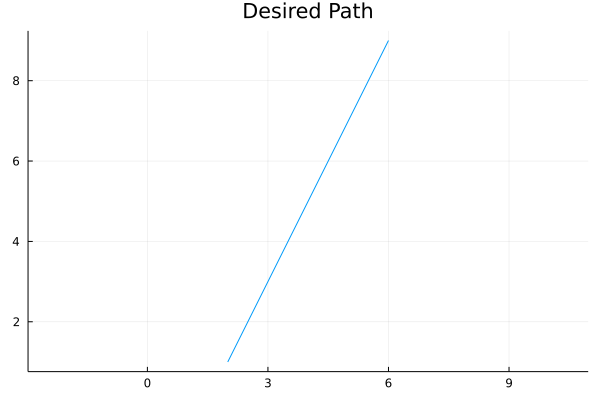

In [42]:
N = 50
t = range(1, 5, length = N)
x =  t .+ 1.0
y = 2 .* t .- 1.0
plot(x,y, title="Desired Path", aspect_ratio = :equal, legend=false)

Taking these input $(x,y)$ values, we can plug into the IK and obtain the values for $\theta_1$, $\theta_2$.

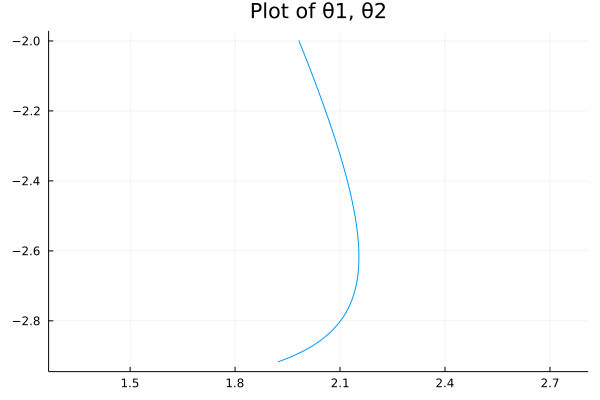

In [43]:
a1,a2 = 10.0,10.0
d =  ((x.*x) .+ (y.*y) .- (a1.*a1) .- (a2.*a2))/(2.0 .* (a1.*a2))
θ2 = atan.(-sqrt.(1.0 .- (d.*d)),d)
θ1 = atan.(y,x) - atan.(a2.* sin.(θ2), a1 .+ a2.*cos.(θ2))
plot(θ1,θ2, title="Plot of θ1, θ2", aspect_ratio = :equal, legend = false)

The obvious question, is this correct?  An easy way to figure this out is to plug those values into the forward kinematics and plot the results.

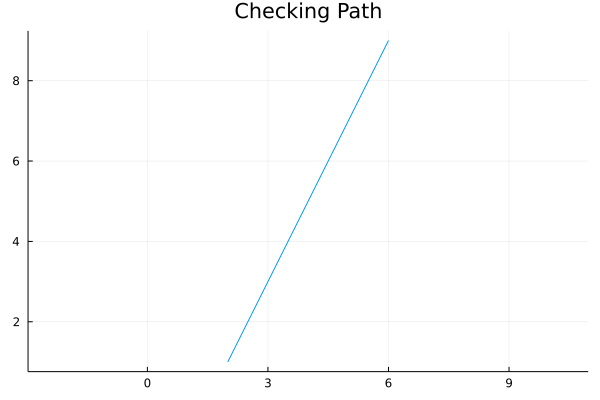

In [44]:
x1 = a2.*cos.(θ1 .+ θ2) .+ a1.*cos.(θ1)
y1 = a2.*sin.(θ1 .+ θ2) .+ a1.*sin.(θ1)
plot(x1,y1, title = "Checking Path", aspect_ratio = :equal, legend=false)
# if you want to overlap the plots
# plot!(x,y)

It can be helpful to visualize the dynamics of the manipulator.  The following example is Julia/Plots animation of the two link manipulator endpoints.   An animation needs a delay (the sleep function) and you need this clear output method to replot over the previous plot.

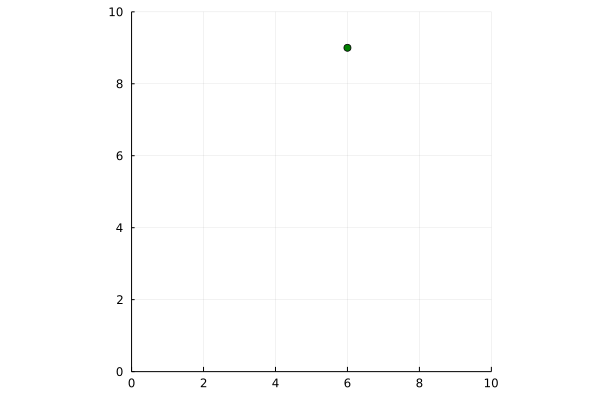

In [45]:
for i = 1:N
    IJulia.clear_output(true)
    p = scatter([x[i]],[y[i]], xlim = (0,10), ylim = (0,10), aspect_ratio = :equal, legend = false, color = :green)
    display(p)
    sleep(0.05)
end

If you want to leave the path (the trace), you can try the following variant.

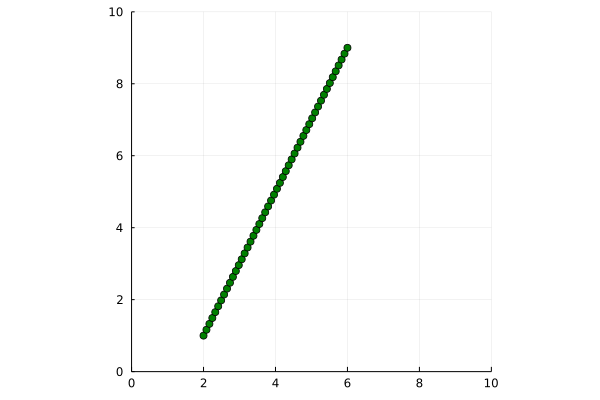

In [46]:
scatter([x[1]],[y[1]], xlim = (0,10), ylim = (0,10), aspect_ratio = :equal, legend = false, color = :green)
for i = 2:N
    IJulia.clear_output(true)
    xl = x[1:i]
    yl = y[1:i]
    p = scatter(xl,yl, xlim = (0,10), ylim = (0,10), aspect_ratio = :equal, legend = false, color = :green)
    display(p)
    sleep(0.05)
end

Just to play with the graphics, we change the trace.  plot! and scatter! are different functions than plot and scatter.  The "!" means this version will add to the previous plot.   Otherwise a new plot is created.

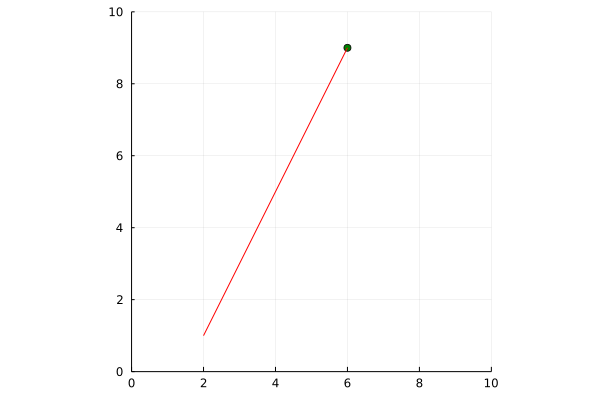

In [47]:
scatter([x[1]],[y[1]], xlim = (0,10), ylim = (0,10), aspect_ratio = :equal, legend = false, color = :green)
for i = 2:N
    IJulia.clear_output(true)
    xl = x[1:i]
    yl = y[1:i]
    p = scatter([x[i]],[y[i]], xlim = (0,10), ylim = (0,10), aspect_ratio = :equal, legend = false, color = :green)
    plot!(xl,yl, color=:red)
    display(p)
    sleep(0.05)
end

An actual animation should in include the link arms.

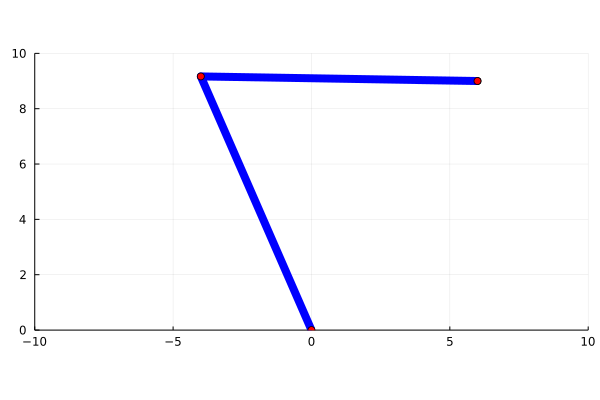

In [48]:
xmid = a1 .* cos.(θ1)
ymid = a1 .* sin.(θ1)
scatter([x[1]],[y[1]], xlim = (-10,10), ylim = (0,10), aspect_ratio = :equal, legend = false, color = :blue)
for i = 2:N
    IJulia.clear_output(true)
    p = scatter([x[i]],[y[i]], xlim = (-10,10), ylim = (0,10), aspect_ratio = :equal, legend = false, color = :blue)
    xl = [0, xmid[i], x[i]]
    yl = [0, ymid[i], y[i]]
    plot!(xl,yl, color=:blue,  linewidth=8)
    scatter!(xl, yl, color=:red, markershape=:circle)
    display(p)
    sleep(0.05)
end

The Interact package connects up some Javascript widgets in the Notebook with Julia.   It supports a variety of widgets and manages the callbacks for you.   This is not a tutorial on the Interact package.  There are some macros available that make the interact package easy to use.  This example sets up two slider bars which are used to set the $\theta_1$, $\theta_2$ values.   

The @manipulate macro sets up the event loop and connects the slider values to values that can be used in the event loop.

In [49]:
function arm(θ1,θ2)
    x1 = cos(θ1)
    y1 = sin(θ1)
    x2 = x1 + cos(θ1+θ2)
    y2 = y1 + sin(θ1+θ2)
    return x1,x2,y1,y2
end

arm (generic function with 1 method)

In [50]:
s1 = slider(-π:0.05:π ,value = 0.0, label="Theta1")
s2 = slider(-π:0.05:π, value = 0.0, label="Theta2")

mp = @manipulate for θ1 in s1, θ2 in s2
    x1,x2,y1,y2 = arm(θ1,θ2)
    xl = [0,x1,x2]
    yl = [0,y1,y2]
    plot(xl,yl, legend=false,xlim=(-2,2),ylim=(-2,2), aspect_ratio = :equal, linewidth=8)
    scatter!(xl, yl, color=:red, markershape=:circle)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Theta1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 126, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
64, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\7401035\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\7401035\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\7401035\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\7401035\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\7401035\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000194c8010, Task (runnable) @0x00000000194c8010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-3.14159\",\"-3.09159\",\"-3.04159\",\"-2.99159\",\"-2.94159\",\"-2.89159\",\"-2.84159\",\"-2.79159\",\"-2.74159\",\"-2.69159\",\"-2.64159\",\"-2.59159\",\"-2.54159\",\"-2.49159\",\"-2.44159\",\"-2.3

To demonstrate how this can be used in 3D, here is the manipulator from the last homework (#23).  

In [ ]:
function arm3(d, a1, a2, θ1)
    x1 = 0
    y1 = 0
    z1 = d
    x2 = a1*cos(θ1)
    y2 = a1*sin(θ1)
    z2 = z1
    x3 = x2
    y3 = y2
    z3 = z1 - a2
    j = [x1,y1,z1,x2,y2,z2,x3,y3,z3]
    return j
end

This gives an example of plots in 3D.

In [ ]:
s1 = slider(0.0:0.01:π/2 ,value = 0.0, label="Theta1")
s2 = slider(1.0:0.01:5, value = 2.0, label="a1")
s3 = slider(1.0:0.01:5, value = 3.0, label="a2")
d = 5

mp = @manipulate for θ1 in s1, a1 in s2, a2 in s3
    j = arm3(d,a1,a2,θ1)
    p1 = [0, j[1], j[4], j[7]]
    p2 = [0,  j[2], j[5], j[8]]
    p3 = [0, j[3], j[6], j[9]]
    plot(p1,p2,p3, xlim=(0,6),ylim=(0,6),zlim=(0,6),linewidth=10,legend=false)
end

A simple "Etch-a-Sketch" type demo:

In [ ]:
s1 = slider(-1:0.1:1, value = 0.0, label="x")
s2 = slider(-1:0.1:1, value = 0.0, label="y")
plot(legend=false,xlim=(-1.5,1.5),ylim=(-1.5,1.5))

mp = @manipulate for x in s1, y in s2
    l1 = [x]
    l2 = [y]
    plot!(l1,l2, markershape=:circle, markercolor=:blue)
end

An interactive plotting tool:

In [ ]:
x = range(0, 10, length=100)
y = sin.(x) .+ 1.5

s1 = slider(1:100, value = 1, label="time")

scatter(legend=false,xlim=(0,10),ylim=(0,3))

mp = @manipulate for t in s1
    i = trunc(Int,t)
    l1 = x[1:i]
    l2 = y[1:i]
    scatter!(l1,l2, markershape=:circle, markercolor=:blue)
end

In [ ]:
x = y = 0:0.1:30

freqs = OrderedDict(zip(["pi/4", "π/2", "3π/4", "π"], [π/4, π/2, 3π/4, π]))

mp = @manipulate for freq1 in freqs, freq2 in slider(0.01:0.1:4π; label="freq2")
    y = @. sin(freq1*x) * sin(freq2*x)
    plot(x, y)
end

An example showing how to clear a plot.

In [ ]:
x = range(0, 10, length=100)
y = sin.(x) .+ 1.5

s1 = slider(1:100, value = 1, label="Time")
s2 = OrderedDict(zip(["Plot", "Clear"], [1, 0]))

scatter(legend=false,xlim=(0,10),ylim=(0,3))

mp = @manipulate for t in s1, Select in s2
    i = trunc(Int,t)
    if Select == 0
        scatter(legend=false,xlim=(0,10),ylim=(0,3))
    else
        l1 = x[1:i]
        l2 = y[1:i]
        scatter!(l1,l2, markershape=:circle, markercolor=:blue)
    end
end

A differential drive example ...

In [ ]:
function DDstep(θ, r, L, ϕ1dot, ϕ2dot, dt)
    δx = (r*dt/2)*(ϕ1dot+ϕ2dot)*cos(θ)
    δy = (r*dt/2)*(ϕ1dot+ϕ2dot)*sin(θ)
    δθ = (r*dt/(2*L))*(ϕ1dot-ϕ2dot)
    return δx, δy, δθ
end

Variable setup for the simulation.

In [ ]:
r = 1
L = 2
N = 100
t = range(0, 5, length = N)
ω1 = 1.25 .+ cos.(t)
ω2 = 1.0 .+ sin.(t)
dt = 0.1
x, y = 0, 0
θ = 0

In [ ]:
lx = zeros(N)
ly = zeros(N)
lθ = zeros(N)

for i = 1:(N-1)
    δx, δy, δθ = DDstep(lθ[i], r, L, ω1[i], ω2[i], dt)
    lx[i+1] = lx[i] + δx
    ly[i+1] = ly[i] + δy
    lθ[i+1] = lθ[i] + δθ
end
scatter(lx,ly, xlim = (0,12), ylim = (-1,2.5), legend = false, color = :blue)

The animation of the simulation loop

In [ ]:
for i = 1:N
    global x, y, θ
    δx, δy, δθ = DDstep(θ, r, L, ω1[i], ω2[i], dt)
    x = x + δx
    y = y + δy
    θ = θ + δθ
    p = scatter([x],[y], xlim = (0,12), ylim = (-1,3), legend = false, color = :blue)
    display(p)
    sleep(0.2)
    IJulia.clear_output(true)
end